In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Alignment-1-Learning.csv')

In [3]:
data.head()

,mH1,mH2,mH3,mA1,mA2,mC1,mC2,TanBeta1,TanBeta2,TanAlpha4,TanGamma1,TanGamma2,TanAlpha1,TanAlpha2,Output
0,125.0,389.681890,266.205554,357.716926,216.548541,437.974724,291.549211,1.825617,0.708838,5.560399,21.627008,24.836633,1.825617,0.708838,1
1,125.0,466.478864,389.569317,402.965051,380.172764,364.184617,381.934382,1.054113,0.609084,10.036226,20.546985,15.891286,1.054113,0.609084,1
2,125.0,220.948750,486.689377,537.099375,320.173513,243.467599,406.498383,1.303290,0.919230,13.261847,23.903331,21.670848,1.303290,0.919230,1
3,125.0,328.343580,323.472676,221.752325,348.389320,487.707855,305.971767,0.793804,0.669176,11.678012,12.508026,14.745824,0.793804,0.669176,1
4,125.0,335.247929,211.280269,206.867278,340.005918,207.546645,227.085078,2.043520,1.108583,16.270581,13.387200,20.521982,2.043520,1.108583,1


In [4]:
#check for any empty cell in database
data.isna().sum()

mH1          0
mH2          0
mH3          0
mA1          0
mA2          0
mC1          0
mC2          0
TanBeta1     0
TanBeta2     0
TanAlpha4    0
TanGamma1    0
TanGamma2    0
TanAlpha1    0
TanAlpha2    0
Output       0
dtype: int64

In [5]:
#data['TanAlpha2'] = data['TanBeta2']

In [6]:
#shuffle the dataframe

data_sh = data.sample(frac = 1.0, random_state = 42)

#reset the index

data_sh = data_sh.reset_index(drop=True)

In [7]:
#put feature variable to X and target variable to Y

X = data_sh.drop('Output', axis = 1)
Y = data_sh['Output']

In [10]:
#Split into train data and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

#Split the training data further into labeled and unlabeled dataset

X_labeled, X_unlabeled, Y_labeled, Y_unlabeled = train_test_split(X_train, Y_train, test_size = 20000, random_state = 42)

In [14]:
print(f"Total Number of datapoints: {len(X)}")
print(f"Number of labeled datapoints: {len(X_labeled)}")
print(f"Number of unlabeled datapoints: {len(X_unlabeled)}")
print(f"Number of test datapoints: {len(X_test)}")

Total Number of datapoints: 54546
Number of labeled datapoints: 18182
Number of unlabeled datapoints: 20000
Number of test datapoints: 16364


# Random Forest Algorithm

In [10]:
#Initialize the Random Forest Classifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [11]:
#Train the model
#random_forest.fit(X_labeled, Y_labeled)
    
#predict on the test data
#Y_test_pred = random_forest.predict(X_test)
    
#Calculate accuracy on the test set
#accuracy = accuracy_score(Y_test,Y_test_pred)
#print(f"Test Accuracy = {accuracy:.6f}")

In [12]:
#Calculate uncertainty scores
#uncertainty_scores = np.max(random_forest.predict_proba(X_unlabeled),axis = 1)

In [13]:
#active learning loop
num_iterations = 17

for iteration in range(num_iterations):
    #Train the model
    random_forest.fit(X_labeled, Y_labeled)
    
    #predict on the test data
    Y_test_pred = random_forest.predict(X_test)
    
    #Calculate accuracy on the test set
    accuracy = accuracy_score(Y_test,Y_test_pred)
    print(f"Iteration : {iteration + 1}: Test Accuracy = {accuracy:.6f}")
    
    #Calculate uncertainty scores
    uncertainty_scores = np.max(random_forest.predict_proba(X_unlabeled),axis = 1)
    
    #Select the most uncertain samples
    num_samples_to_label = 1000
    selected_indices = np.argsort(uncertainty_scores)[-num_samples_to_label:]
    
    #move the selected samples from unlabeled to labeled data
    X_labeled = pd.concat([X_labeled, X_unlabeled.iloc[selected_indices]])
    Y_labeled = pd.concat([Y_labeled, pd.Series(Y_unlabeled.iloc[selected_indices])])
    
    #Remove the newly labeled samples from the unlabeled data
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[selected_indices])
    Y_unlabeled = Y_unlabeled.drop(Y_unlabeled.index[selected_indices])
    
#Train the final model on all labeled data 
final_random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
final_random_forest.fit(X_labeled, Y_labeled)

#Evaluate the final model on the test data
Y_test_pred = final_random_forest.predict(X_test)
final_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Final Model Test Accuracy: {final_accuracy:.6f}")

Iteration : 1: Test Accuracy = 0.999633
Iteration : 2: Test Accuracy = 0.999633
Iteration : 3: Test Accuracy = 0.999633
Iteration : 4: Test Accuracy = 0.999633
Iteration : 5: Test Accuracy = 0.999756
Iteration : 6: Test Accuracy = 0.999694
Iteration : 7: Test Accuracy = 0.999756
Iteration : 8: Test Accuracy = 0.999756
Iteration : 9: Test Accuracy = 0.999756
Iteration : 10: Test Accuracy = 0.999756
Iteration : 11: Test Accuracy = 0.999633
Iteration : 12: Test Accuracy = 0.999694
Iteration : 13: Test Accuracy = 0.999694
Iteration : 14: Test Accuracy = 0.999694
Iteration : 15: Test Accuracy = 0.999694
Iteration : 16: Test Accuracy = 0.999694
Iteration : 17: Test Accuracy = 0.999694
Final Model Test Accuracy: 0.999817


## Model Prediction

In [14]:
check = np.array([[125.        , 548.79592171, 220.74098546, 639.7299823 ,
        548.25791409, 536.29424167, 464.2678568 ,   6.5371347 ,
         18.76849351,   9.33981287,   8.37140462,  18.82344807,
          6.5371347 ,  18.76849351]])

In [15]:
check

array([[125.        , 548.79592171, 220.74098546, 639.7299823 ,
        548.25791409, 536.29424167, 464.2678568 ,   6.5371347 ,
         18.76849351,   9.33981287,   8.37140462,  18.82344807,
          6.5371347 ,  18.76849351]])

In [22]:
final_random_forest.predict(check)

/home/khanna_akshat/miniconda3/envs/work_env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

# XGBoost

In [10]:
import xgboost as xgb

In [11]:
#Initialize the XGBoost Classifier

xgb_model = xgb.XGBClassifier(n_estimators = 100, random_state = 42)

In [12]:
#active learning loop
num_iterations = 5

for iteration in range(num_iterations):
    #Train the model
    xgb_model.fit(X_labeled, Y_labeled)
    
    #predict on the test data
    Y_test_pred = xgb_model.predict(X_test)
    
    #Calculate accuracy on the test set
    accuracy = accuracy_score(Y_test,Y_test_pred)
    print(f"Iteration : {iteration + 1}: Test Accuracy = {accuracy:.6f}")
    
    #Calculate uncertainty scores
    uncertainty_scores = np.max(xgb_model.predict_proba(X_unlabeled),axis = 1)
    
    #Select the most uncertain samples
    num_samples_to_label = 700
    selected_indices = np.argsort(uncertainty_scores)[-num_samples_to_label:]
    
    #move the selected samples from unlabeled to labeled data
    X_labeled = pd.concat([X_labeled, X_unlabeled.iloc[selected_indices]])
    Y_labeled = pd.concat([Y_labeled, pd.Series(Y_unlabeled.iloc[selected_indices])])
    
    #Remove the newly labeled samples from the unlabeled data
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[selected_indices])
    Y_unlabeled = Y_unlabeled.drop(Y_unlabeled.index[selected_indices])
    
#Train the final model on all labeled data 
final_xgb_model = xgb.XGBClassifier(n_estimators = 100, random_state = 42)
final_xgb_model.fit(X_labeled, Y_labeled)

#Evaluate the final model on the test data
Y_test_pred = final_xgb_model.predict(X_test)
final_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Final Model Test Accuracy: {final_accuracy:.6f}")

Iteration : 1: Test Accuracy = 0.999817
Iteration : 2: Test Accuracy = 0.999756
Iteration : 3: Test Accuracy = 0.999694
Iteration : 4: Test Accuracy = 0.999756
Iteration : 5: Test Accuracy = 0.999756
Final Model Test Accuracy: 0.999817


## Model Prediction

In [23]:
check = np.array([[125.        , 548.79592171, 220.74098546, 639.7299823 ,
        548.25791409, 536.29424167, 464.2678568 ,   6.5371347 ,
         18.76849351,   9.33981287,   8.37140462,  18.82344807,
          6.5371347 ,  18.76849351]])

In [24]:
check

array([[125.        , 548.79592171, 220.74098546, 639.7299823 ,
        548.25791409, 536.29424167, 464.2678568 ,   6.5371347 ,
         18.76849351,   9.33981287,   8.37140462,  18.82344807,
          6.5371347 ,  18.76849351]])

In [26]:
final_xgb_model.predict(check)

array([0])

## Graph

In [2]:
#reading the file containing allowed points
data_pas = pd.read_csv('Alignment-1-New.csv')

# reading the file containing disallowed points
data_notpas = pd.read_csv('Alignment-1-Negative.csv')

### Plot between mH2 and mH3

In [3]:
#isolating the columns to be plotted 
plot_param_h2 = data_pas.iloc[:,1]
plot_param_h3 = data_pas.iloc[:,2]

In [4]:
#converting to list
h2 = plot_param_h2.tolist()
h3 = plot_param_h3.tolist()

Text(0, 0.5, 'mH3')

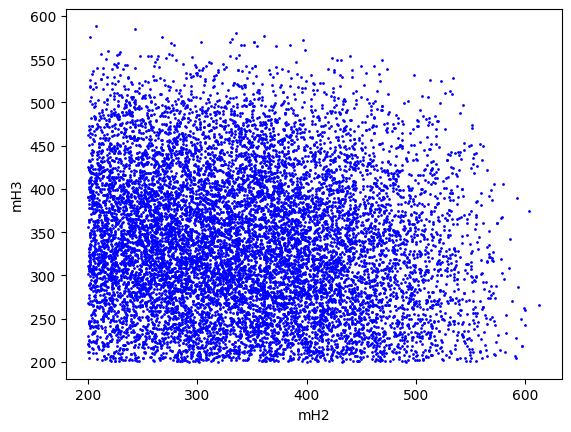

In [5]:
#plotting the allowed points

import matplotlib.pyplot as plt

marker_size = 1
plt.scatter(h2,h3, color='b', s = marker_size)
plt.xlabel('mH2')
plt.ylabel('mH3')

In [7]:
#isolating the columns to be plotted 
plot_paramnot_h2 = data_notpas.iloc[:,1]
plot_paramnot_h3 = data_notpas.iloc[:,2]

In [8]:
#converting to list
h2not = plot_paramnot_h2.tolist()
h3not = plot_paramnot_h3.tolist()

Text(0, 0.5, 'mH3')

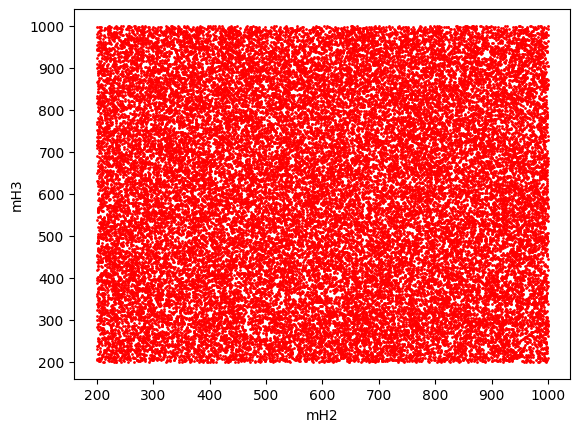

In [9]:
#plotting the disallowed points
marker_size = 1
plt.scatter(h2not,h3not, color='r', s = marker_size)
plt.xlabel('mH2')
plt.ylabel('mH3')

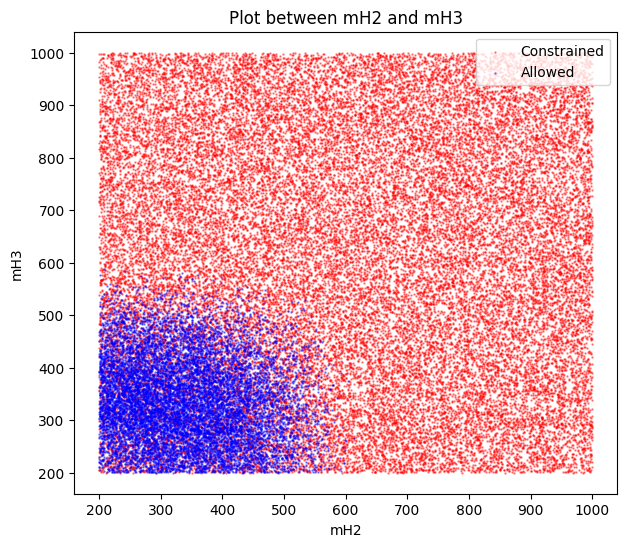

In [14]:
#plotting together

marker_size = 0.7
plt.figure(figsize=(7,6))
plt.title("Plot between mH2 and mH3")
plt.scatter(h2not,h3not, color='r',s=marker_size, alpha = 0.4, label = 'Constrained')
plt.scatter(h2,h3, color='b', s=marker_size, alpha = 0.4, label = 'Allowed')
plt.xlabel('mH2')
plt.ylabel('mH3')

plt.legend(loc = 'upper right')

/home/khanna_akshat/miniconda3/envs/work_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


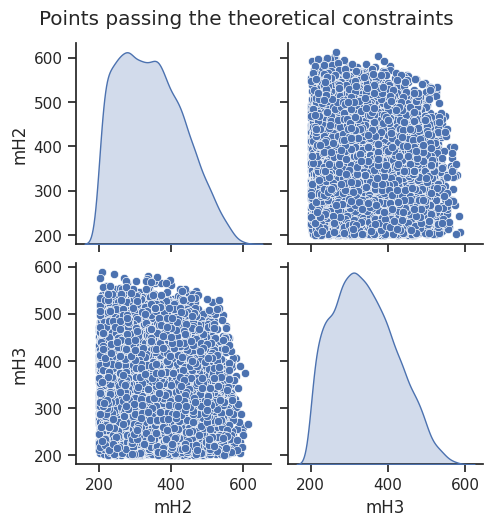

In [11]:
#corner plot for points that passes the theoretical constraints

corner_plot = pd.concat([plot_param_h2,plot_param_h3],axis = 1)

import seaborn as sns

sns.set(style="ticks")
sns.pairplot(corner_plot, markers='o', diag_kind = "kde")

plt.suptitle("Points passing the theoretical constraints", y=1.04)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

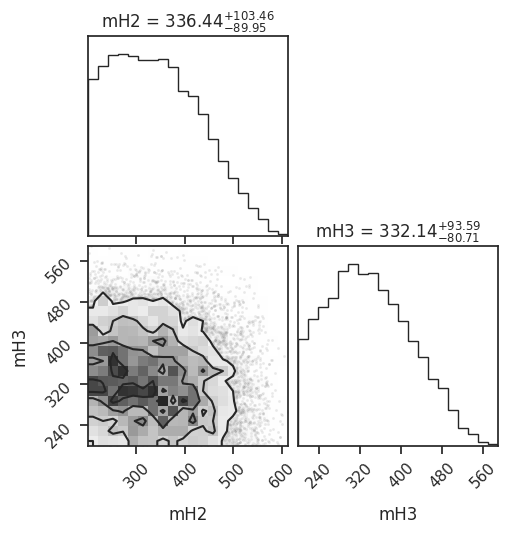

In [24]:
import corner

corner.corner(corner_plot, labels = corner_plot.columns, show_titles = True)

plt.show()

### Plot between mHp2 and mHp3

In [3]:
#isolating the columns to be plotted 
plot_param_hp2 = data_pas.iloc[:,5]
plot_param_hp3 = data_pas.iloc[:,6]

In [6]:
#converting to list
hp2 = plot_param_hp2.tolist()
hp3 = plot_param_hp3.tolist()

Text(0, 0.5, 'mHp3')

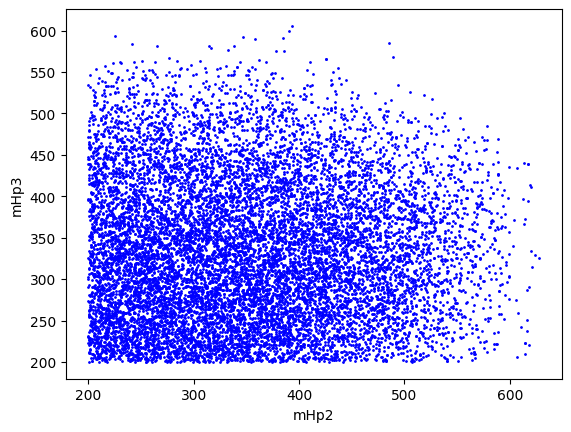

In [7]:
#plotting the allowed points

import matplotlib.pyplot as plt

marker_size = 1
plt.scatter(hp2,hp3, color='b', s = marker_size)
plt.xlabel('mHp2')
plt.ylabel('mHp3')

In [9]:
#isolating the columns to be plotted 
plot_paramnot_hp2 = data_notpas.iloc[:,5]
plot_paramnot_hp3 = data_notpas.iloc[:,6]

In [10]:
#converting to list
hp2not = plot_paramnot_hp2.tolist()
hp3not = plot_paramnot_hp3.tolist()

Text(0, 0.5, 'mHp3')

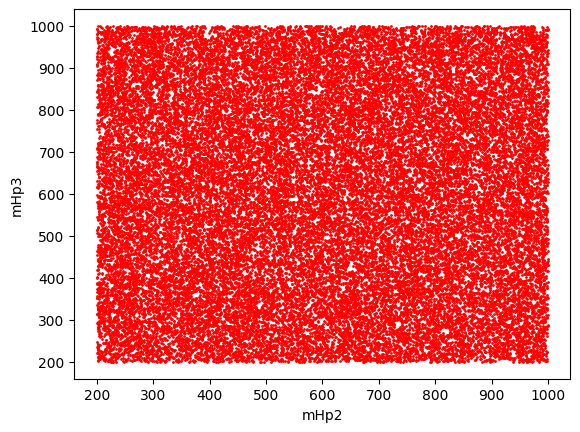

In [11]:
#plotting the disallowed points

marker_size = 1
plt.scatter(hp2not,hp3not, color='r', s = marker_size)
plt.xlabel('mHp2')
plt.ylabel('mHp3')

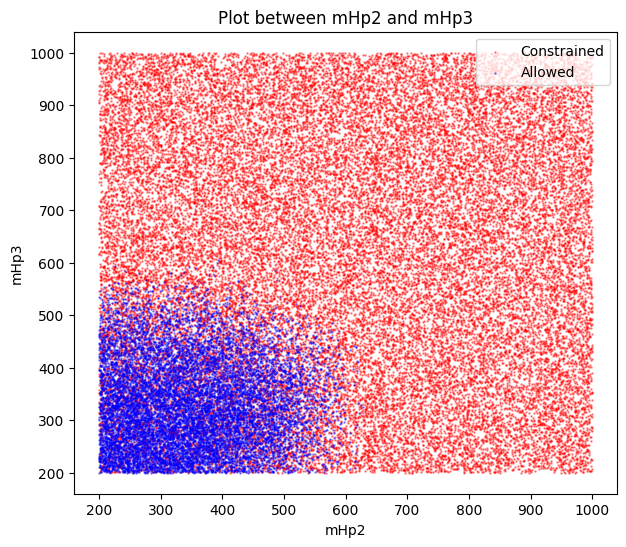

In [12]:
#plotting together

marker_size = 0.7
plt.figure(figsize=(7,6))
plt.title("Plot between mHp2 and mHp3")
plt.scatter(hp2not,hp3not, color='r',s=marker_size, alpha = 0.4, label = 'Constrained')
plt.scatter(hp2,hp3, color='b', s=marker_size, alpha = 0.4, label = 'Allowed')
plt.xlabel('mHp2')
plt.ylabel('mHp3')

plt.legend(loc = 'upper right')

### Plot between mA1 and mA2

In [3]:
#isolating the columns to be plotted 
plot_param_a1 = data_pas.iloc[:,3]
plot_param_a2 = data_pas.iloc[:,4]

In [4]:
#converting to list
a1 = plot_param_a1.tolist()
a2 = plot_param_a2.tolist()

Text(0, 0.5, 'mA2')

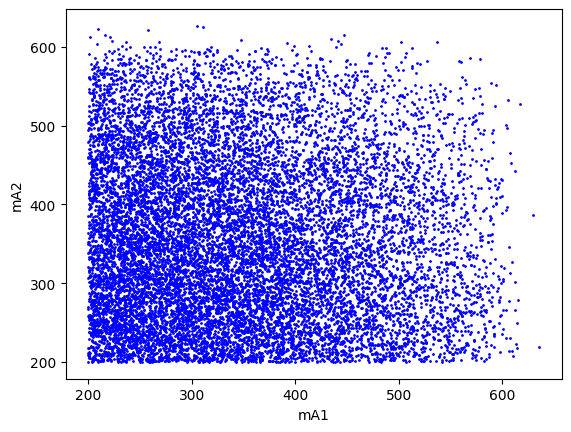

In [5]:
#plotting the allowed points

import matplotlib.pyplot as plt

marker_size = 1
plt.scatter(a1,a2, color='b', s = marker_size)
plt.xlabel('mA1')
plt.ylabel('mA2')

In [7]:
#isolating the columns to be plotted 
plot_paramnot_a1 = data_notpas.iloc[:,3]
plot_paramnot_a2 = data_notpas.iloc[:,4]

In [8]:
#converting to list
a1not = plot_paramnot_a1.tolist()
a2not = plot_paramnot_a2.tolist()

Text(0, 0.5, 'mA2')

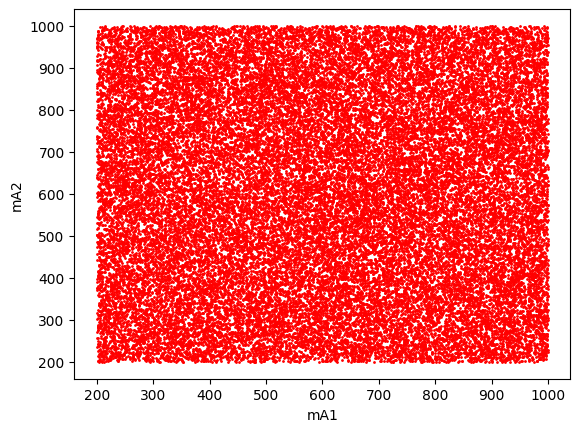

In [9]:
#plotting the disallowed points

marker_size = 1
plt.scatter(a1not,a2not, color='r', s = marker_size)
plt.xlabel('mA1')
plt.ylabel('mA2')

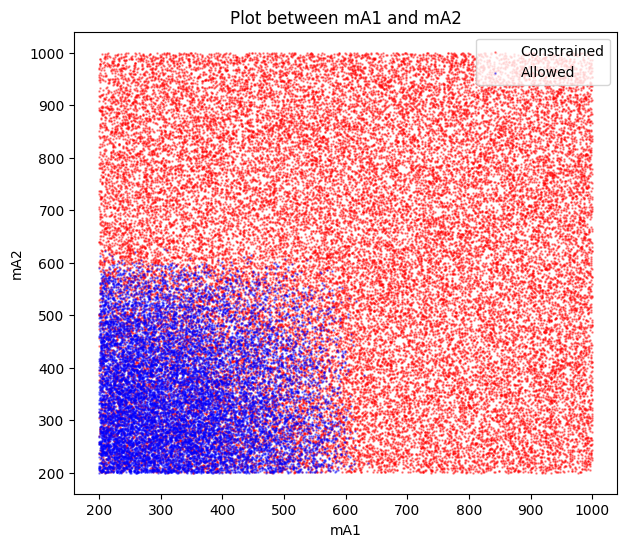

In [10]:
#plotting together

marker_size = 0.7
plt.figure(figsize=(7,6))
plt.title("Plot between mA1 and mA2")
plt.scatter(a1not,a2not, color='r',s=marker_size, alpha = 0.4, label = 'Constrained')
plt.scatter(a1,a2, color='b', s=marker_size, alpha = 0.4, label = 'Allowed')
plt.xlabel('mA1')
plt.ylabel('mA2')

plt.legend(loc = 'upper right')

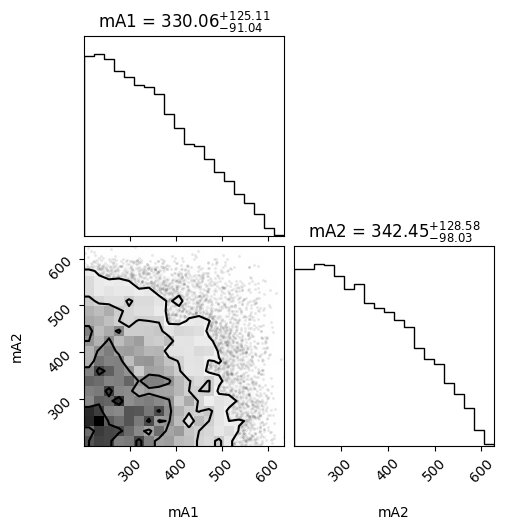

In [11]:
corner_plot = pd.concat([plot_param_a1,plot_param_a2],axis = 1)

import corner

corner.corner(corner_plot, labels = corner_plot.columns, show_titles = True)

plt.show()